# Lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append("../")
import lib.utils as utils
import lib.fiber_solvers as solvers

path_to_fig = os.path.join("/home", "higorsmonteiro", "Documents", "library", 
                           "0.Research", "fiber_circuits_project", "texts",
                          "homeostasis", "figs", "numerics")

# Two input nodes FFF circuit

**Circuit diagram**:

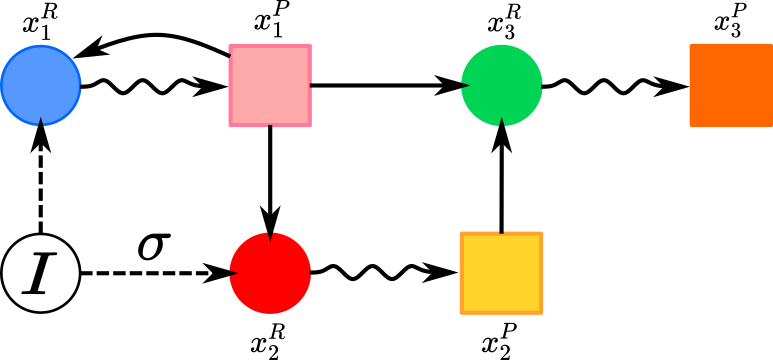

In [3]:
from IPython.display import Image
Image(filename='broken_n1_1.png') 

<br>
The dynamics of the circuit above is given by the model below:

$$ \begin{aligned} f_{x_1^R}(x_1^R, x_1^P, \mathcal{I}) &= -\delta x_1^R + \gamma\tilde{f}(x_1^P) + \mathcal{I}\\ f_{x_1^P}(x_1^P, x_1^R) &= -\alpha x_1^P + \beta x_1^R \\ f_{x_2^R}(x_2^R, x_1^P, \mathcal{I}) &= -\delta x_2^R + \gamma\tilde{f}(x_1^P) + \sigma \mathcal{I} \\ f_{x_2^P}(x_2^P, x_2^R) &= -\alpha x_2^P + \beta x_2^R   \\ f_{x_3^R}(x_3^R, x_1^P, x_2^P) &= -\delta x_3^R + \gamma \tilde{g}(x_1^P,x_2^P) \\ f_{x_3^P}(x_3^P, x_3^R) &= -\alpha x_3^P + \beta x_3^R
 \end{aligned}, $$
 <br>
where we assume that $\tilde{f}$ and $\tilde{g}$ are sigmoid functions in the $[0,1]$ interval. More specifically $\tilde{f}$ and $\tilde{g}$ are represented by Hill functions.

<br>

The infinitesimal homeostasis condition for this circuit is given by the general form:

$$ \begin{aligned} &f_{x_2^R, \mathcal{I}}f_{x_2^P, x_2^R}f_{x_3^R, x_2^P}(f_{x_1^P, x_1^R}f_{x_1^P, x_1^P} - f_{x_1^R,x_1^R}f_{x_1^P, x_1^R}) + \\& f_{x_1^R, \mathcal{I}}f_{x_1^P,x_1^R}(f_{x_2^R,x_1^P}f_{x_2^P, x_2^R}f_{x_3^R, x_2^P} + f_{x_2^R,x_2^R}f_{x_2^P,x_2^P}f_{x_3^R,x_1^P}) = 0 \end{aligned}$$

with $f_{x_i^R,x_j^R}$ representing the partial derivative of $f_{x_i^R}$ with respect to variable $x_j^R$. Considering the vector fields above, the infinitesimal homeostasis at a stable equilibrium is obtained if 

$$ \rho(\mathcal{I}_0) \equiv \tilde{g}'(x_1^P, x_2^P) \bigg\{ \alpha \delta (1+\sigma) + \gamma \beta \tilde{f}'(x_1^P)(1-\sigma) \bigg\} = 0 ,$$

implying the additional conditions

$$ \frac{d\rho}{d\mathcal{I}}(\mathcal{I}_0) = 0 \ \text{ and } \ \frac{d^2\rho}{d\mathcal{I}^2}(\mathcal{I}_0) \neq 0 ,$$
for the infinitesimal chair condition.

<br>

According to the conditions above, we obtain the following relations:

$$ \begin{aligned} \tilde{f}(x_1^P) &= \frac{\alpha \delta}{\beta \gamma}x_1^P - \frac{\mathcal{I}_0}{\gamma} \\ \tilde{f}'(x_1^P) &= - \frac{\alpha\delta}{\beta\gamma}\frac{(1+\sigma)}{(1-\sigma)} \\ \tilde{f}&''(x_1^P) = 0 \\ \tilde{f}&'''(x_1^P) \neq 0  \end{aligned} $$
for $\sigma \neq 1$.

Another useful condition comes from the stability of a equilibrium point:

$$ \frac{\delta \alpha}{\beta} > \tilde{f}'(x_1^P)$$


## Special cases

Here we consider cases where the exponent of the Hill function $S(x)$ is 2:
$$ S(x) = \frac{1}{1+x^2}$$
with the following derivatives:
$$ S'(x) = -\frac{2x}{(1+x^2)^2}  $$

$$ S''(x) = -\frac{2(1-3x^2)}{(1+x^2)^3}  $$

$$ S'''(x) = \frac{24x(1-x²)}{(1+x^2)^4}  $$
<br>

## UNSAT-FFF, $\tilde{f}(x_1^P) \equiv S(x_1^P) $

For this case, the general conditions above are now given as
$$ \begin{aligned} S(x_1^P) &= \frac{\alpha \delta}{\beta \gamma}x_1^P - \frac{\mathcal{I}_0}{\gamma} \\ S'(x_1^P) &= - \frac{\alpha\delta}{\beta\gamma}\frac{(1+\sigma)}{(1-\sigma)} \\ S&''(x_1^P) = 0 \\ S&'''(x_1^P) \neq 0  \end{aligned} $$
for $\sigma \neq 1$.

Concerning the stability of the equilibrium point, we have 

$$ \frac{\delta \alpha}{\beta} > 0 > S'(x_1^P(\infty)) ,$$

which is always satisfied for $x_1^P > 0$ and positive parameters $\alpha, \delta, \beta$.

1. From $S''(x_1^P) = 0$, we obtain $x_1^P(\mathcal{I}_0) = 1/\sqrt{3}$.

2. From $ S'(x_1^P(I_0)) = -(3\sqrt{3})/8 $, we have 
$$ \frac{\alpha \delta}{\beta \gamma} = \frac{3\sqrt{3}}{8}\frac{(1-\sigma)}{(1+\sigma)} $$

3. From the relation of $S(x_1^P)$ and knowing $x_1^P(\mathcal{I}_0)$, we have
$$ \begin{aligned} \mathcal{I}_0 &= \gamma\bigg(\frac{\alpha \delta}{\beta \gamma}\frac{1}{\sqrt{3}} - \frac{3}{4}\bigg) \\ &= \gamma\bigg(\frac{3}{8}\frac{(1-\sigma)}{(1+\sigma)} - \frac{3}{4}\bigg)  \end{aligned} $$. 

**Conditions on $\sigma$**:
<br>
From $\mathcal{I} \geq -\gamma$:
$$ \mathcal{I}_0 = \gamma\bigg( \frac{3}{8}\frac{(1-\sigma)}{(1+\sigma)} - \frac{3}{4}\bigg) \geq -\gamma $$
implying that 
$$ \frac{1-\sigma}{1+\sigma} \geq -\frac{2}{3} \Rightarrow \sigma < 5 $$

Also, we have 
$$ \frac{\alpha \delta}{\beta \gamma} = \frac{3\sqrt{3}}{8}\frac{(1-\sigma)}{(1+\sigma)} > 0 $$
since $ \alpha, \delta, \beta, \gamma > 0 $. Thus,
$$ \frac{1-\sigma}{1+\sigma} > 0 \Rightarrow \sigma < 1 $$

### Model parameters

In [4]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
gamma = 1.2
alpha = 0.8
beta = 1.0
sigma = 0.5

def find_delta(gamma, alpha, beta, sigma):
    return gamma*beta*(3*np.sqrt(3)/8)*((1-sigma)/(1+sigma))/(alpha)

delta = find_delta(gamma, alpha, beta, sigma)

params = np.array([delta, gamma, alpha, beta, sigma])
initial = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [5]:
res = utils.run_fff_test(params, initial, (1,1), tf=40, npoints_I=400, I_sample=-0.6)

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p = res[2]

### Plots

#### Sample solution

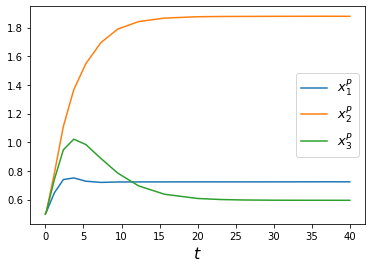

In [6]:
fig_sol, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})

#### Protein concentration on $\mathcal{I}$

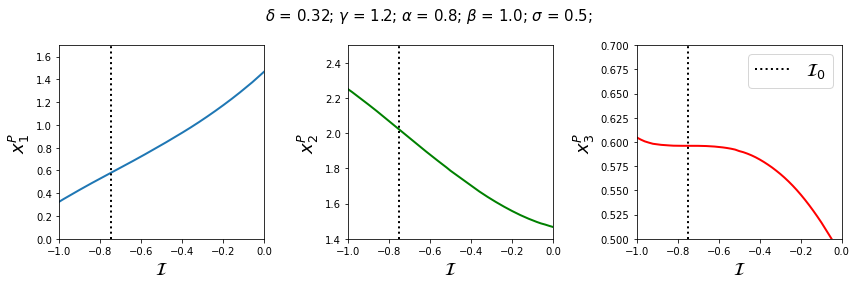

In [7]:
fig_unsat, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
ax.plot(input_range, x1p, lw=2)
ax1.plot(input_range, x2p, c="green", lw=2)
ax2.plot(input_range, x3p, c="red", lw=2)
ax.fill_between(input_range, -30., 0.0, alpha=0.4)
for axis in [ax, ax1, ax2]:
    axis.set_xlim([-1.0,0])
ax.set_ylim([-0.0,1.7])
ax1.set_ylim([1.4,2.5])
ax2.set_ylim([0.5,0.70])
    
ax.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax1.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.legend(prop={'size':18}, loc=1)

for index, axis in enumerate([ax,ax1,ax2]):
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=18)

temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2}; $\sigma$ = {params[4]:0.2};"
fig_unsat.suptitle(temp1+temp2, fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
#fig_unsat.savefig(os.path.join(path_to_fig, "unsatfff_twoinput_1.pdf"))

### Sensibility to the type of the external regulations

We fix the parameters used to obtain the chair above, and change the regulations that define the function $\tilde{g}(x_1^P + x_2^P)$. There are four possibilities for $\tilde{g}$:

$$\begin{aligned} 0. \ \tilde{g}(x_1^P,x_2^P) & = 1 - S(x_1^P + x_2^P) \\ 1. \ \tilde{g}(x_1^P,x_2^P) &= S(x_1^P + x_2^P) \\ 2. \ \tilde{g}(x_1^P,x_2^P) &= (1 - S(x_1^P))S(x_2^P)? \\  \end{aligned} $$

In [8]:
# Obtain the solutions for all cases:
res_0 = utils.run_fff_test(params, initial, (1,0), npoints_I=400)
res_1 = utils.run_fff_test(params, initial, (1,1), npoints_I=400)
res_2 = utils.run_fff_test(params, initial, (1,2), npoints_I=400)

#### Case 0 

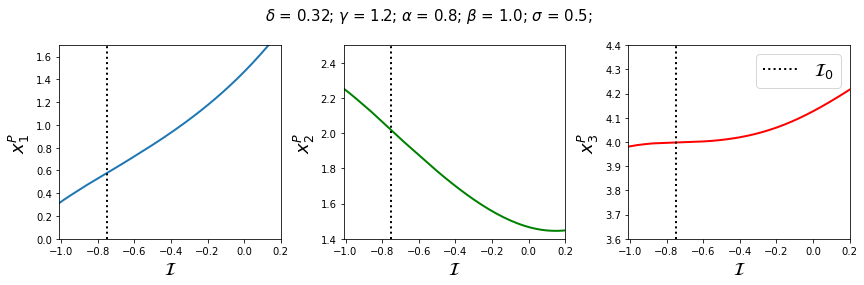

In [9]:
sample_sol_c = res_0[0]
input_range_c = res_0[1]
x1p_c, x2p_c, x3p_c = res_0[2]
Io_c = res_0[3]

fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
ax.plot(input_range_c, x1p_c, lw=2)
ax1.plot(input_range_c, x2p_c, c="green", lw=2)
ax2.plot(input_range_c, x3p_c, c="red", lw=2)
ax.fill_between(input_range, -30., 0.0, alpha=0.4)

for axis in [ax, ax1, ax2]:
    axis.set_xlim([-1.01,0.2])
ax.set_ylim([-0.0,1.7])
ax1.set_ylim([1.4,2.5])
ax2.set_ylim([3.6,4.40])
    
ax.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax1.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.legend(prop={'size':18}, loc=1)

for index, axis in enumerate([ax,ax1,ax2]):
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=18)

temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2}; $\sigma$ = {params[4]:0.2};"
fig.suptitle(temp1+temp2, fontsize=15) 
    
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
#fig.savefig(os.path.join(path_to_fig, "unsatfff_twoinput_2.pdf"))

#### Case 1

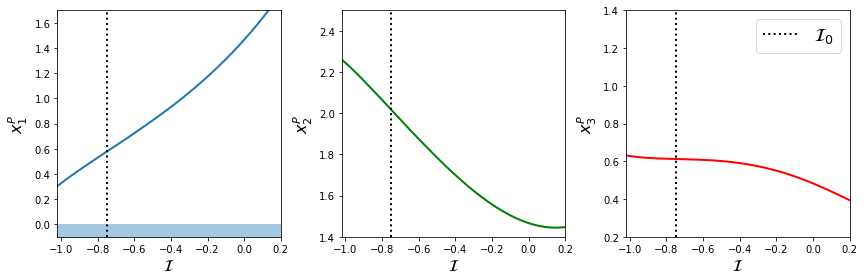

In [10]:
sample_sol_c = res_1[0]
input_range_c = res_1[1]
x1p_c, x2p_c, x3p_c = res_1[2]
Io_c = res_1[3]

fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
ax.plot(input_range_c, x1p_c, lw=2)
ax1.plot(input_range_c, x2p_c, c="green", lw=2)
ax2.plot(input_range_c, x3p_c, c="red", lw=2)
ax.fill_between(input_range, -30., 0.0, alpha=0.4)

for axis in [ax, ax1, ax2]:
    axis.set_xlim([-1.02,0.2])
ax.set_ylim([-0.1,1.7])
ax1.set_ylim([1.4,2.5])
ax2.set_ylim([0.2,1.40])
    
ax.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax1.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.legend(prop={'size':18}, loc=1)

for axis in [ax,ax1,ax2]:
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=16)
ax.set_ylabel(r"$x_1^P$", fontsize=16)
ax1.set_ylabel(r"$x_2^P$", fontsize=16)
ax2.set_ylabel(r"$x_3^P$", fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()

#### Case 2

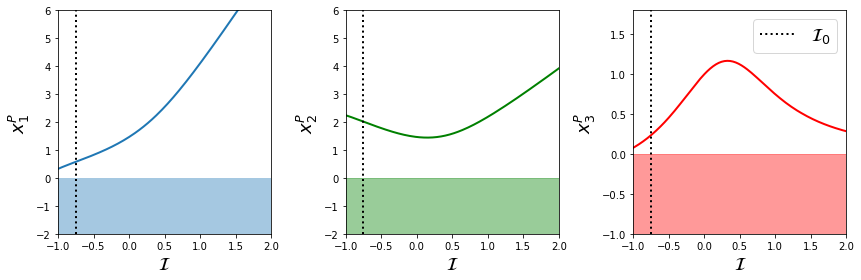

In [11]:
sample_sol_c = res_2[0]
input_range_c = res_2[1]
x1p_c, x2p_c, x3p_c = res_2[2]
Io_c = res_2[3]

fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
ax.plot(input_range_c, x1p_c, lw=2)
ax1.plot(input_range_c, x2p_c, c="green", lw=2)
ax2.plot(input_range_c, x3p_c, c="red", lw=2)
ax.fill_between(input_range, -30., 0.0, alpha=0.4)
ax1.fill_between(input_range, -30., 0.0, color='green', alpha=0.4)
ax2.fill_between(input_range, -30., 0.0, color='red', alpha=0.4)

for axis in [ax, ax1, ax2]:
    axis.set_xlim([-1.0,2.0])
    axis.set_ylim([-2.0,6.0])
#ax.set_ylim([-0.1,1.7])
#ax1.set_ylim([1.4,2.5])
ax2.set_ylim([-1.,1.80])
    
ax.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax1.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.legend(prop={'size':18}, loc=1)

for index, axis in enumerate([ax,ax1,ax2]):
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=18)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()

## SAT-FFF, $\tilde{f}(x_1^P) \equiv 1 - S(x_1^P) $

For this case, the general conditions above are now given as
$$ \begin{aligned} S(x_1^P) &= -\frac{\alpha \delta}{\beta \gamma}x_1^P + \big(1+ \frac{\mathcal{I}_0}{\gamma}\big) \\ S'(x_1^P) &= \frac{\alpha\delta}{\beta\gamma}\frac{(1+\sigma)}{(1-\sigma)} \\ S&''(x_1^P) = 0 \\ S&'''(x_1^P) \neq 0  \end{aligned} $$
for $\sigma \neq 1$.

Concerning the stability of the equilibrium point, we have 

$$ \frac{\delta \alpha}{\beta} > -S'(x_1^P(\infty)) > 0 ,$$

which is only satisfied for specific values of $\alpha, \delta, \beta$ and $x_1^P > 0$.

1. From $S''(x_1^P) = 0$, we obtain $x_1^P(\mathcal{I}_0) = 1/\sqrt{3}$.

2. From $ S'(x_1^P(I_0)) = -(3\sqrt{3})/8 $, we have 
$$ \frac{\alpha \delta}{\beta \gamma} = - \frac{3\sqrt{3}}{8}\frac{(1-\sigma)}{(1+\sigma)} $$

3. From the relation of $S(x_1^P)$ and knowing $x_1^P(\mathcal{I}_0)$, we have
$$ \begin{aligned} \mathcal{I}_0 &= \gamma\bigg(\frac{\alpha \delta}{\beta \gamma}\frac{1}{\sqrt{3}} - \frac{1}{4}\bigg) \\ &= -\gamma\bigg(\frac{3}{8}\frac{(1-\sigma)}{(1+\sigma)} + \frac{1}{4}\bigg)  \end{aligned} $$.

**Conditions on $\sigma$**:
<br>
From $\mathcal{I} \geq -\gamma$:
$$ \mathcal{I}_0 = -\gamma\bigg(\frac{3}{8}\frac{(1-\sigma)}{(1+\sigma)} + \frac{1}{4}\bigg) \geq -\gamma $$
implying that 
$$ \frac{(1-\sigma)}{(1+\sigma)} \leq 2 \Rightarrow \sigma \geq -\frac{1}{3} $$

Also, we have 
$$ \frac{\alpha \delta}{\beta \gamma} = - \frac{3\sqrt{3}}{8}\frac{(1-\sigma)}{(1+\sigma)} > 0 $$
since $ \alpha, \delta, \beta, \gamma > 0 $. Thus,
$$ \frac{1-\sigma}{1+\sigma} < 0 \Rightarrow \sigma > 1 $$

### Model parameters

In [107]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
gamma = 1.0
alpha = 0.28
beta = 1.0
sigma = 0

def find_delta(gamma, alpha, beta, sigma):
    return -gamma*beta*(3*np.sqrt(3)/8)*((1-sigma)/(1+sigma))/(alpha)

delta = find_delta(gamma, alpha, beta, sigma)
delta = 0.5

params = np.array([delta, gamma, alpha, beta, sigma])
initial = np.array([1.5, 1.51, 1.51, 1.51, 1.5, 1.5])

print(fr"$\delta$ = {delta}; $\gamma$ = {gamma}; $\alpha$ = {alpha}")
print(fr"$\beta$ = {beta}; $\sigma$ = {sigma};")
#print(fr"delta*alpha/beta = {delta*alpha/beta}")

$\delta$ = 0.5; $\gamma$ = 1.0; $\alpha$ = 0.28
$\beta$ = 1.0; $\sigma$ = 0;


In [109]:
res = utils.run_fff_test(params, initial, (0,0), tf=40, I_sample=-0.1875, npoints_I=800, I_factor=2)

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p = res[2]

I_min, x1p_Io, x2p_Io = None, None, None
for k in range(len(x1p)):
    if x1p[k]>=0.0 and x2p[k]>=0.0 and x3p[k]>=0.0:
        I_min = input_range[k]
        break
for k in range(len(x1p)):
    if input_range[k]>Io:
        x1p_Io, x2p_Io = x1p[k-1], x2p[k-1]
        break
        
print(Io, I_min, x1p_Io, x2p_Io)

-0.625 -0.5398936170212769 -0.9844547428573072 3.515450363300713


### Plots

#### Sample solution

Text(0.5, 0.98, '$\\mathcal{I}$ = $\\mathcal{I}_0$ = -0.62; $x_3^P(\\infty)$ = 7.10')

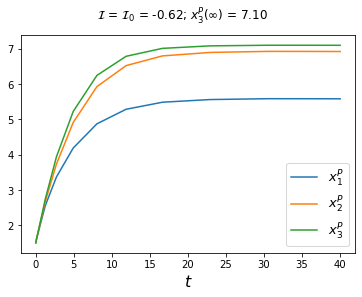

In [110]:
# Sample solution 
fig_sol, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})
fig_sol.suptitle(r"$\mathcal{I}$ = $\mathcal{I}_0$ = %0.2f; $x_3^P(\infty)$ = %.2f" % (Io, sample_sol.y[5][-1]))

#### Protein concentration

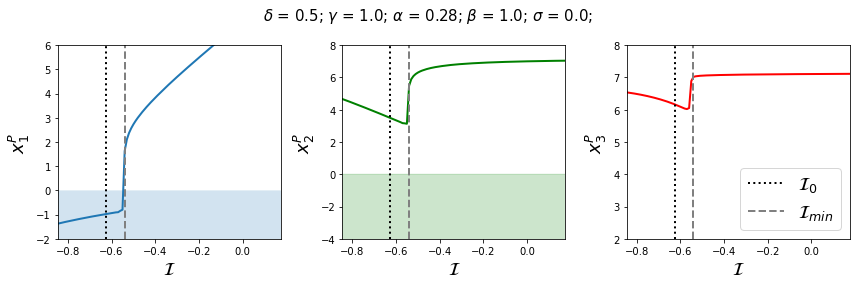

In [114]:
fig_sat, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
ax.plot(input_range, x1p, lw=2)
ax1.plot(input_range, x2p, c="green", lw=2)
ax2.plot(input_range, x3p, c="red", lw=2)
ax.fill_between(input_range, -30, 0, alpha=0.2)
ax1.fill_between(input_range, -30, 0, color="green", alpha=0.2)
ax2.fill_between(input_range, -30, 0, color="red", alpha=0.2)
for axis in [ax, ax1, ax2]:
    axis.set_xlim([Io-0.22,Io+0.8])
ax.set_ylim([-2,6])
ax1.set_ylim([-4,8])
ax2.set_ylim([2.0,8.0])
    
ax.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax1.axvline(Io, 0, 1, color="black", ls=":", lw=2)
ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
ax1.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
ax2.axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
ax2.legend(prop={'size':18}, loc=0)

for axis in [ax,ax1,ax2]:
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
ax.set_ylabel(r"$x_1^P$", fontsize=18)
ax1.set_ylabel(r"$x_2^P$", fontsize=18)
ax2.set_ylabel(r"$x_3^P$", fontsize=18)

temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2}; $\sigma$ = {params[4]:0.2};"
fig_sat.suptitle(temp1+temp2, fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
#fig_sat.savefig(os.path.join(path_to_fig, "satfff_twoinput_ex1.pdf"))

Considering the case above, $\tilde{f(x_1^P)} \equiv 1 - S(x_1^P)$ and $\tilde{g}(x_1^P, x_2^P) \equiv 1 - S(x_1^P + x_2^P)$, the system obtains homeostasis behavior by satisfying the first term of the product defining $\rho(\mathcal{I})$ for all $\mathcal{I} > \mathcal{I}_c$, which is given by the first derivative of $\tilde{g}(x_1^P, x_2^P)$. Moreover, all the derivatives of $\rho$ also go to zero as all their terms contain high-order derivatives of $\tilde{g}(x_1^P, x_2^P)$ (in this case, a Hill function of the sum of the protein concentrations $x_1^P$ and $x_2^P$): $$ \pm S^{(n)}(x_1^P(\mathcal{I}) + x_2^P(\mathcal{I})) \rightarrow 0 \Rightarrow \frac{d^{(n-1)}\rho}{d\mathcal{I}^{(n-1)}}(\mathcal{I}) \rightarrow 0 \ \ \  \forall \mathcal{I} > \mathcal{I}_c$$

In [51]:
def Hill2d(x,y,exp=2):
    z = (x+y)
    return 1/(1+z**exp)

def Hill2d_prime1(x,y,exp=2):
    z = (x+y)
    return -2*z/((1+z**exp)**2)

def Hill2d_prime2(x,y,exp=2):
    z = (x+y)
    return -(2*(1-3*z**exp))/((1+z**exp)**3)

def Hill2d_prime3(x,y,exp=2):
    z = (x+y)
    return (24*z*(1-z**2))/((1+z**exp)**4)


#### Plot derivatives of $\tilde{g}$

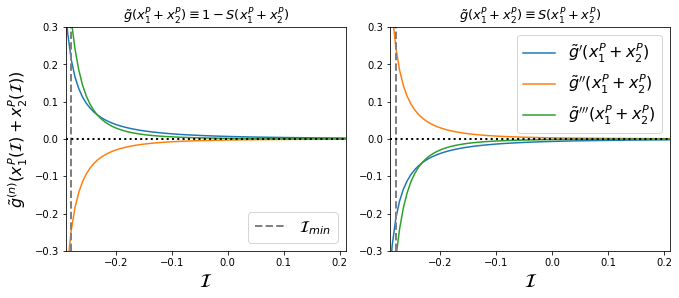

In [105]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9.5,4.2))

ax1.plot(input_range, -1*Hill2d_prime1(x1p, x2p))
ax1.plot(input_range, -1*Hill2d_prime2(x1p, x2p))
ax1.plot(input_range, -1*Hill2d_prime3(x1p, x2p))
ax2.plot(input_range, Hill2d_prime1(x1p, x2p), label=r"$\tilde{g}'(x_1^P+x_2^P)$")
ax2.plot(input_range, Hill2d_prime2(x1p, x2p), label=r"$\tilde{g}''(x_1^P+x_2^P)$")
ax2.plot(input_range, Hill2d_prime3(x1p, x2p), label=r"$\tilde{g}'''(x_1^P+x_2^P)$")

ax1.axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
ax2.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
ax1.axhline(0, 0, 1, color="black", ls=':', lw=2)
ax2.axhline(0, 0, 1, color="black", ls=':', lw=2)

for axis in [ax1, ax2]:
    axis.set_xlim([Io-0.20,Io+0.3])
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=19)
ax1.set_ylim([-0.3,0.3])
ax2.set_ylim([-0.3,0.3])
         
ax1.set_ylabel(r"$\tilde{g}^{(n)}(x_1^P(\mathcal{I}) + x_2^P(\mathcal{I}))$", fontsize=16)
ax1.set_title(r"$\tilde{g}(x_1^P + x_2^P) \equiv 1 - S(x_1^P+x_2^P)$",fontsize=13)
ax2.set_title(r"$\tilde{g}(x_1^P + x_2^P) \equiv S(x_1^P+x_2^P)$",fontsize=13)
ax2.legend(prop={'size':16})
ax1.legend(prop={'size':16}, loc=4)
fig.savefig(os.path.join(path_to_fig, 'satfff_derivatives_g.pdf'))
plt.tight_layout()

# Single input node $\phi_2$ Fibonacci circuit

**Circuit diagram 1**:

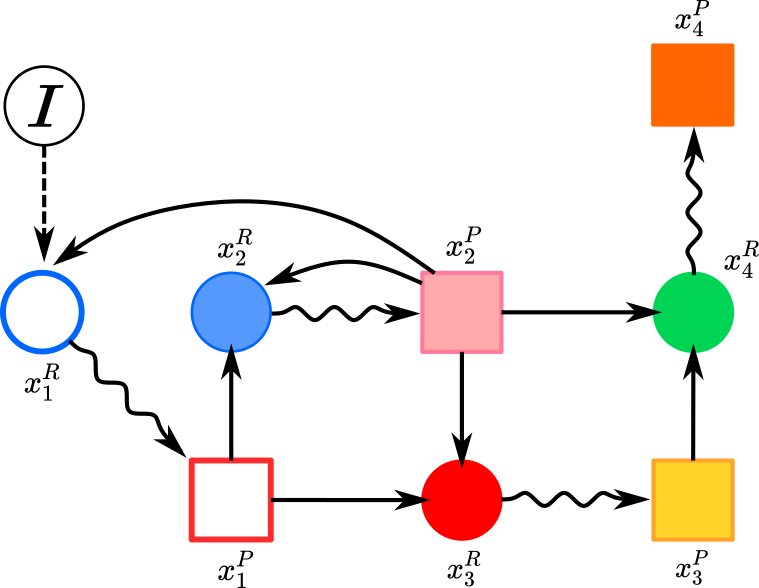

In [12]:
from IPython.display import Image
Image(filename='broken_fibo_2.png') 

<br>
The dynamics of the circuit above is given by the model below:

$$ \begin{aligned} f_{x_1^R}(x_1^R, x_2^P, \mathcal{I}) &= -\delta x_1^R + \gamma\tilde{f}(x_2^P) + \mathcal{I}\\ f_{x_1^P}(x_1^P, x_1^R) &= -\alpha x_1^P + \beta x_1^R \\ f_{x_2^R}(x_2^R, x_1^P, x_2^P) &= -\delta x_2^R + \gamma\tilde{g}(x_1^P, x_2^P) \\ f_{x_2^P}(x_2^P, x_2^R) &= -\alpha x_2^P + \beta x_2^R   \\ f_{x_3^R}(x_3^R, x_1^P, x_2^P) &= -\delta x_3^R + \gamma \tilde{g}(x_1^P,x_2^P) \\ f_{x_3^P}(x_3^P, x_3^R) &= -\alpha x_3^P + \beta x_3^R \\ f_{x_4^R}(x_4^R, x_2^P, x_3^P) &= -\delta x_4^R + \gamma \tilde{h}(x_2^P, x_3^P) \\ f_{x_4^P}(x_4^P, x_4^R) &= -\alpha x_4^P + \beta x_4^R
 \end{aligned}, $$
 <br>
where we assume that $\tilde{f}$, $\tilde{g}$ and $\tilde{h}$ are sigmoid functions in the $[0,1]$ interval. More specifically $\tilde{f}$, $\tilde{g}$ and $\tilde{h}$ are represented by Hill functions. In the special model above, we impose that the input function for $x_2^R$ and $x_3^R$ are given by the same function $\tilde{g}$, but this can be relaxed in later analysis.

$$ \rho(I_0) \equiv \tilde{g}(x_1^P, x_2^P)\tilde{h}(x_2^P,x_3^P) = \tilde{g}(x_1^P +  x_2^P)\tilde{h}(x_2^P + x_3^P) = 0 $$

### Model parameters

In [2]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
delta = 0.5
gamma = 1.0
alpha = 2.5
beta = 1.0

params = np.array([delta, gamma, alpha, beta])
initial = np.array([0.4, 0.3, 0.4, 0.5, 0.4, 0.4, 0.4, 0.8])

print(fr"$\delta$ = {delta}; $\gamma$ = {gamma}; $\alpha$ = {alpha}")
print(fr"$\beta$ = {beta};")
#print(fr"delta*alpha/beta = {delta*alpha/beta}")

$\delta$ = 0.5; $\gamma$ = 1.0; $\alpha$ = 2.5
$\beta$ = 1.0;


In [3]:
res = utils.run_2fibo_test(params, initial, (1,1,1), tf=40, I_sample=2.0, npoints_I=100, 
                           I_factor=2, input_node=[1.0,0.0,0.0,0.0])

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p, x4p = res[2]

I_min, x1p_Io, x2p_Io = None, None, None
for k in range(len(x1p)):
    if x1p[k]>=0.0 and x2p[k]>=0.0 and x3p[k]>=0.0:
        I_min = input_range[k]
        break
#for k in range(len(x1p)):
#    if input_range[k]>Io:
#        x1p_Io, x2p_Io = x1p[k-1], x2p[k-1]
#        break
        
print(Io, I_min, x1p_Io, x2p_Io)

2.0 -0.707070707070707 None None


### Plots

#### Sample solution

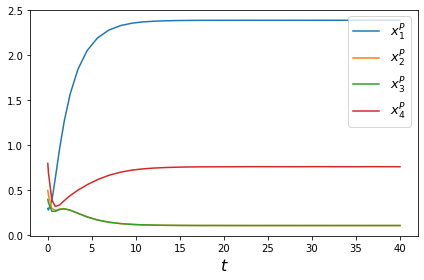

In [4]:
# Sample solution 
fig_sol, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.plot(sample_sol.t, sample_sol.y[7], label=r"$x_4^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})
plt.tight_layout()
#fig_sol.suptitle(r"$\mathcal{I}$ = $\mathcal{I}_0$ = %0.2f; $x_3^P(\infty)$ = %.2f" % (Io, sample_sol.y[5][-1]))

#### Protein concentration

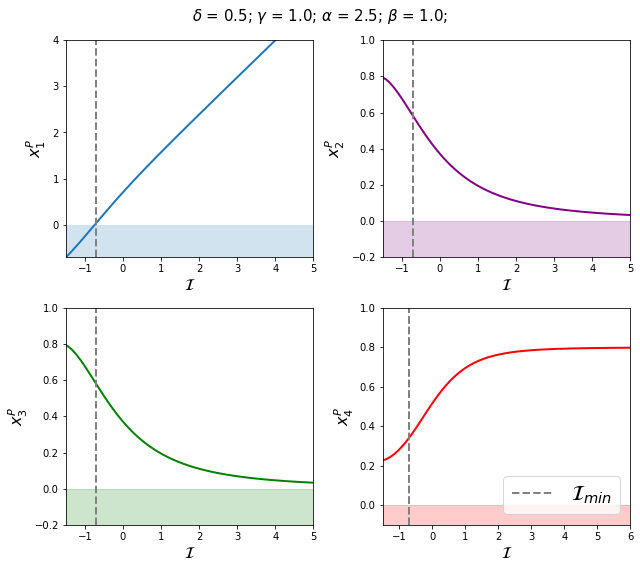

In [5]:
fig_sat, AX = plt.subplots(2,2, figsize=(9,8))
AX[0,0].plot(input_range, x1p, lw=2)
AX[0,1].plot(input_range, x2p, lw=2, c="purple")
AX[1,0].plot(input_range, x3p, c="green", lw=2)
AX[1,1].plot(input_range, x4p, c="red", lw=2)
AX[0,0].fill_between(input_range, -20, 0, alpha=0.2)
AX[0,1].fill_between(input_range, -30, 0, color="purple", alpha=0.2)
AX[1,0].fill_between(input_range, -30, 0, color="green", alpha=0.2)
AX[1,1].fill_between(input_range, -30, 0, color="red", alpha=0.2)
for axis in [AX[0,0], AX[0,1], AX[1,0], AX[1,1]]:
    axis.set_xlim([Io-3.5,Io+3.0])
    axis.set_ylim([-.2,1])
    axis.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
#ax.set_ylim([-0.5,1.5])
#ax1.set_ylim([-4,4])
AX[0,0].set_ylim([-.7,4.0])
AX[1,1].set_ylim([-.1,1.0])
AX[1,1].set_xlim([Io-3.5, Io+4.0])
AX[1,1].axvline(I_min, 0,1,color="gray", ls="--", lw=2, label=r"$\mathcal{I}_{min}$")
    
#ax.axvline(Io, 0, 1, color="black", ls=":", lw=2)
#ax1.axvline(Io, 0, 1, color="black", ls=":", lw=2)
#ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
#ax.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
#ax1.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
#ax2.axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
AX[1,1].legend(prop={'size':21}, loc=4)

for axis in [AX[0,0], AX[0,1], AX[1,0], AX[1,1]]:
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=16)
AX[0,0].set_ylabel(r"$x_1^P$", fontsize=16)
AX[0,1].set_ylabel(r"$x_2^P$", fontsize=16)
AX[1,0].set_ylabel(r"$x_3^P$", fontsize=16)
AX[1,1].set_ylabel(r"$x_4^P$", fontsize=16)

temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2};"
fig_sat.suptitle(temp1+temp2, fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
#fig_sat.savefig(os.path.join(path_to_fig, "fibo_x1r_ex1.pdf"))

**Circuit diagram 2**:

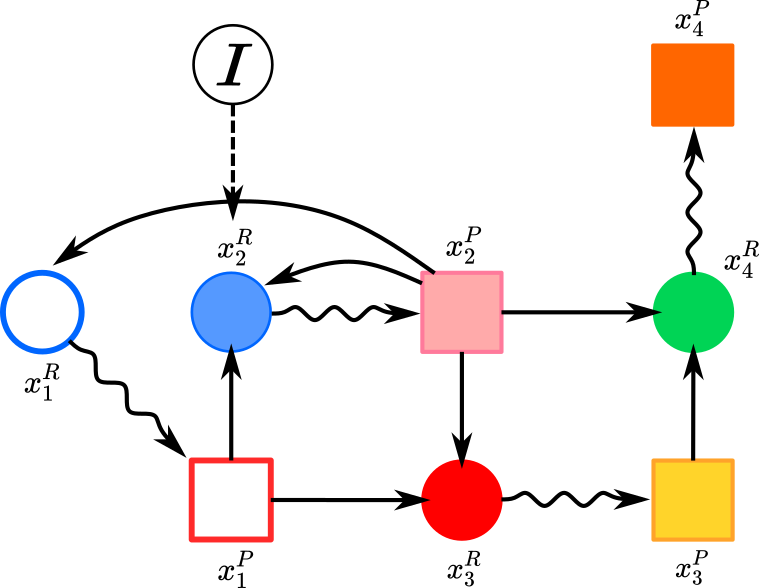

In [6]:
from IPython.display import Image
Image(filename='broken_fibo_1.png') 

<br>
The dynamics of the circuit above is given by the model below:

$$ \begin{aligned} f_{x_1^R}(x_1^R, x_2^P, \mathcal{I}) &= -\delta x_1^R + \gamma\tilde{f}(x_2^P) \\ f_{x_1^P}(x_1^P, x_1^R) &= -\alpha x_1^P + \beta x_1^R \\ f_{x_2^R}(x_2^R, x_1^P, x_2^P) &= -\delta x_2^R + \gamma\tilde{g}(x_1^P, x_2^P) + \mathcal{I} \\ f_{x_2^P}(x_2^P, x_2^R) &= -\alpha x_2^P + \beta x_2^R   \\ f_{x_3^R}(x_3^R, x_1^P, x_2^P) &= -\delta x_3^R + \gamma \tilde{g}(x_1^P,x_2^P) \\ f_{x_3^P}(x_3^P, x_3^R) &= -\alpha x_3^P + \beta x_3^R \\ f_{x_4^R}(x_4^R, x_2^P, x_3^P) &= -\delta x_4^R + \gamma \tilde{h}(x_2^P, x_3^P) \\ f_{x_4^P}(x_4^P, x_4^R) &= -\alpha x_4^P + \beta x_4^R
 \end{aligned}, $$
 <br>
where we assume that $\tilde{f}$, $\tilde{g}$ and $\tilde{h}$ are sigmoid functions in the $[0,1]$ interval. More specifically $\tilde{f}$, $\tilde{g}$ and $\tilde{h}$ are represented by Hill functions. In the special model above, we impose that the input function for $x_2^R$ and $x_3^R$ are given by the same function $\tilde{g}$, but this can be relaxed in later analysis.
<br>

Considering $x_2^R$ as the input node, we obtain a different homeostasis condition, defined by the determinant of the matrix:
$$  H(\mathcal{L}'(x_2^P, x_4^R)) = 
    \begin{pmatrix}
        f_{x_1^R,x_1^R} & 0 & f_{x_1^R, x_2^P} & 0 & 0\\
        f_{x_1^P,x_1^R} & f_{x_1^P,x_1^P} & 0 & 0 & 0 \\
        0 & f_{x_3^R,x_1^P} & f_{x_3^R,x_2^P} & f_{x_3^R,x_3^R} & 0 \\
        0 & 0 & 0 & f_{x_3^P,x_3^R} & f_{x_3^P,x_3^P} \\
        0 & 0 & f_{x_4^R,x_2^P} & 0 & f_{x_4^R,x_3^P} \\
    \end{pmatrix}, $$
or according to the standard model:
$$  H(\mathcal{L}'(x_2^P, x_4^R)) = 
    \begin{pmatrix}
        -\delta & 0 & \gamma\tilde{f}'(x_2^P) & 0 & 0\\
        \beta & -\alpha & 0 & 0 & 0 \\
        0 & \gamma\tilde{g}'(x_1^P, x_2^P) &\gamma\tilde{g}'(x_1^P, x_2^P) & -\delta & 0 \\
        0 & 0 & 0 & \beta & -\alpha \\
        0 & 0 & \gamma\tilde{h}'(x_2^P, x_3^P) & 0 & \gamma\tilde{h}'(x_2^P, x_3^P) \\
    \end{pmatrix}, $$
    
giving the expression
$$ \rho(\mathcal{I_0}) \equiv \tilde{h}'(x_2^P, x_3^P)\bigg[ \delta^2\alpha^2 + \delta\alpha\beta\gamma\tilde{g}'(x_1^P, x_2^P) + \gamma^2\beta^2\tilde{f}'(x_2^P)\tilde{g}'(x_1^P, x_2^P)\bigg] = 0 $$
for the infinitesimal homeostasis condition. This condition implies the additional conditions

$$ \frac{d\rho}{d\mathcal{I}}(\mathcal{I}_0) = 0 \ \text{ and } \ \frac{d^2\rho}{d\mathcal{I}^2}(\mathcal{I}_0) \neq 0 ,$$

for the infinitesimal chair condition.

### Model parameters

In [72]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
delta = 1.0
gamma = 0.9
alpha = 0.5
beta = 0.8

params = np.array([delta, gamma, alpha, beta])
initial = np.array([1.2, 1.5, 1.2, 1.5, 1.2, 1.5, 1.2, 1.5])

find_delta = lambda par: (9/4)*(1/(np.sqrt(15)-np.sqrt(3)))*(par[3]*par[1]/par[2]) 
delta = find_delta(params)
params = np.array([delta, gamma, alpha, beta])

print(fr"$\delta$ = {delta}; $\gamma$ = {gamma}; $\alpha$ = {alpha}")
print(fr"$\beta$ = {beta};")
#print(fr"delta*alpha/beta = {delta*alpha/beta}")

$\delta$ = 1.5133592215195995; $\gamma$ = 0.9; $\alpha$ = 0.5
$\beta$ = 0.8;


In [73]:
res = utils.run_2fibo_test(params, initial, (1,1,1), tf=40, I_sample=2.0, npoints_I=100, 
                           I_factor=2, input_node=[0.0,1.0,0.0,0.0])

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p, x4p = res[2]
Io = utils.calculate_Io_fibo(params, g="repressor")

I_min, x1p_Io, x2p_Io = None, None, None
for k in range(len(x1p)):
    if x1p[k]>=0.0 and x2p[k]>=0.0 and x3p[k]>=0.0:
        I_min = input_range[k]
        break
#for k in range(len(x1p)):
#    if input_range[k]>Io:
#        x1p_Io, x2p_Io = x1p[k-1], x2p[k-1]
#        break
        
print(Io, I_min, x1p_Io, x2p_Io)

-1.169427190999916 -0.46464646464646453 None None


### Plots

#### Sample solution

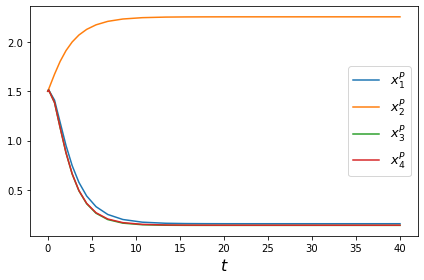

In [74]:
# Sample solution 
fig_sol, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.plot(sample_sol.t, sample_sol.y[7], label=r"$x_4^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})
plt.tight_layout()
#fig_sol.suptitle(r"$\mathcal{I}$ = $\mathcal{I}_0$ = %0.2f; $x_3^P(\infty)$ = %.2f" % (Io, sample_sol.y[5][-1]))

#### Protein concentration

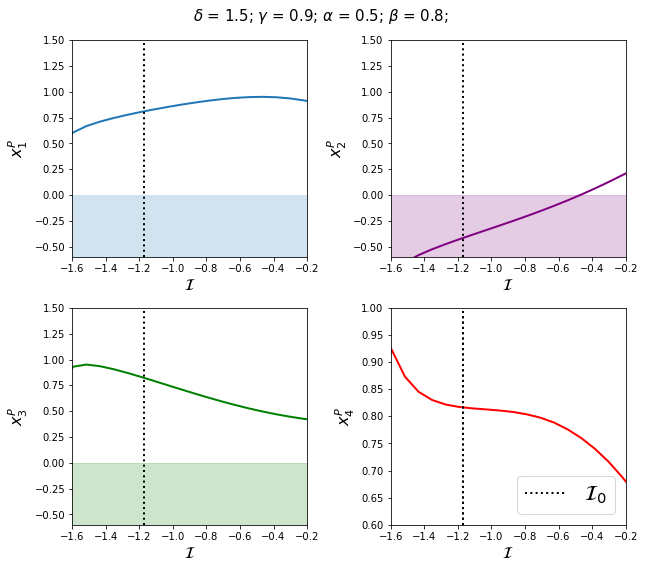

In [87]:
fig_sat, AX = plt.subplots(2,2, figsize=(9,8))
AX[0,0].plot(input_range, x1p, lw=2)
AX[0,1].plot(input_range, x2p, lw=2, c="purple")
AX[1,0].plot(input_range, x3p, c="green", lw=2)
AX[1,1].plot(input_range, x4p, c="red", lw=2)
AX[0,0].fill_between(input_range, -20, 0, alpha=0.2)
AX[0,1].fill_between(input_range, -30, 0, color="purple", alpha=0.2)
AX[1,0].fill_between(input_range, -30, 0, color="green", alpha=0.2)
AX[1,1].fill_between(input_range, -30, 0, color="red", alpha=0.2)
for axis in [AX[0,0], AX[0,1], AX[1,0], AX[1,1]]:
    axis.set_xlim([-1.60,-0.2])
    axis.set_ylim([-0.6,1.5])
    axis.axvline(Io, 0, 1, color="black", ls=':', lw=2)
#ax.set_ylim([-0.5,1.5])
#ax1.set_ylim([-4,4])
#AX[0,0].set_ylim([-.7,4.0])
AX[1,1].set_ylim([0.6,1.0])
#AX[1,1].set_xlim([Io-3.5, Io+4.0])
#AX[1,1].axvline(I_min, 0,1,color="gray", ls="--", lw=2, label=r"$\mathcal{I}_{min}$")
    
#ax.axvline(Io, 0, 1, color="black", ls=":", lw=2)
#ax1.axvline(Io, 0, 1, color="black", ls=":", lw=2)
AX[1,1].axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
#ax.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
#ax1.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
#ax2.axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
AX[1,1].legend(prop={'size':21}, loc=4)

for axis in [AX[0,0], AX[0,1], AX[1,0], AX[1,1]]:
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=16)
AX[0,0].set_ylabel(r"$x_1^P$", fontsize=16)
AX[0,1].set_ylabel(r"$x_2^P$", fontsize=16)
AX[1,0].set_ylabel(r"$x_3^P$", fontsize=16)
AX[1,1].set_ylabel(r"$x_4^P$", fontsize=16)

temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2};"
fig_sat.suptitle(temp1+temp2, fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
#fig_sat.savefig(os.path.join(path_to_fig, "fibo_x2r_Ionotallowed_reference.pdf"))

In [35]:
2/np.sqrt(2)

1.414213562373095

In [120]:
np.sqrt(3)

1.7320508075688772